## writting simple nural network for mnist dataset

In [8]:
#import libraries
import numpy as np
import scipy.special #here its used for the activation function(writting clear sigmoid fun.)
import matplotlib.pyplot as plt

In [13]:
class nuralnetwork:
    def __init__(self,inputnode,hiddennodes,outputnodes,learningrate):
        self.inode=inputnode
        self.onode=outputnodes
        self.hnode=hiddennodes
        self.lr=learningrate
        
        #declaration of input to hidden weights (wih) and hidden to output nodes (who) in form of matrices
        #the wih matix has hnode rows and inode columns
        self.wih=np.random.normal(0.0, pow(self.hnode, -0.5),(self.hnode, self.inode))
        self.who=np.random.normal(0.0, pow(self.onode, -0.5),(self.onode, self.hnode))
        
        #writting the activation function
        self.act_fun=lambda x:scipy.special.expit(x)
        
    def train(self,inputs_list,targets_list):
        #convert list to 2D array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        #signals into and out of hidden layer nodes (in form of matrix)
        hi_inp=np.dot(self.wih,inputs)
        hi_out=self.act_fun(hi_inp)
        #signals into and out of final layer
        fi_inp=np.dot(self.who,hi_out)
        fi_out=self.act_fun(fi_inp)
        
        output_err=targets-fi_out #error at output layer
        hidd_err=np.dot(self.who.T,output_err) #hidden layer error is the output_err,split by weights,
        #recombined at hidden nodes
        #now we have reached the core or the heart of our network
        # update the weights for the links between the hidden and output layers
        self.who=self.who+self.lr*np.dot((output_err*fi_out*(1.0-fi_out)),np.transpose(hi_out))
        # update the wight for links btw input layer and hidden layer
        self.wih+=self.lr*np.dot((hidd_err*hi_out*(1.0-hi_out)),np.transpose(inputs))
        
    def query(self,inputs_list):
        inputs=np.array(inputs_list,ndmin=2).T
        
        hi_inp=np.dot(self.wih,inputs)
        hi_out=self.act_fun(hi_inp)
        
        fi_inp=np.dot(self.who,hi_out)
        fi_out=self.act_fun(fi_inp)
        
        return (fi_out)
    def exit_out(self):
        return(self.wih,lambda x:scipy.special.expit(x),self.who)
        
        

In [15]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
# learning rate is 0.3
learning_rate = 0.3
# create instance of neural network
n = nuralnetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_test.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()
# train the neural network
# go through all records in the training data set

for record in training_data_list:    
# split the record by the ',' commas
    all_values = record.split(',')
# scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
# create the target output values (all 0.01, except the desired label which is 0.99)
    targets = np.zeros(output_nodes) + 0.0
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)


In [16]:
x_wih,x_act,x_who=n.exit_out()
def nural(input_l):
    x_act=lambda x:scipy.special.expit(x)
    inp=np.array(input_l,ndmin=2).T
    hi_i=np.dot(x_wih,input_l)
    hi_o=x_act(hi_i)
    fi_i=np.dot(x_who,hi_o)
    fi_o=x_act(fi_i)
    return (fi_o)

In [18]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [19]:
all_val=test_data_list[3].split(',')
print(all_val[0])

0


In [20]:
nural((np.asfarray(all_val[1:])/255.0*0.99)+0.01)

array([9.30000998e-01, 1.00101861e-04, 3.95781537e-03, 4.07265296e-04,
       1.89775509e-06, 1.16162535e-02, 2.13729765e-02, 2.49719384e-03,
       5.39772593e-05, 5.05554691e-05])

In [21]:
n.query((np.asfarray(all_val[1:])/255.0*0.99)+0.01)

array([[9.30000998e-01],
       [1.00101861e-04],
       [3.95781537e-03],
       [4.07265296e-04],
       [1.89775509e-06],
       [1.16162535e-02],
       [2.13729765e-02],
       [2.49719384e-03],
       [5.39772593e-05],
       [5.05554691e-05]])

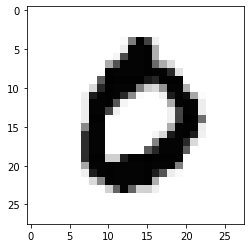

In [16]:
img_arr=(np.asfarray(all_val[1:]).reshape(28,28))
plt.imshow(img_arr,cmap='Greys',interpolation='None')

In [17]:
"""# test the neural network
# scorecard for how well the network performs, initially empty
scorecard = []
# go through all the records in the test data set
for record in test_data_list:
# split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    #print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
    # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
    # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass"""

'# test the neural network\n# scorecard for how well the network performs, initially empty\nscorecard = []\n# go through all the records in the test data set\nfor record in test_data_list:\n# split the record by the \',\' commas\n    all_values = record.split(\',\')\n    # correct answer is first value\n    correct_label = int(all_values[0])\n    #print(correct_label, "correct label")\n    # scale and shift the inputs\n    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01\n    # query the network\n    outputs = n.query(inputs)\n    # the index of the highest value corresponds to the label\n    label = np.argmax(outputs)\n    #print(label, "network\'s answer")\n    # append correct or incorrect to list\n    if (label == correct_label):\n    # network\'s answer matches correct answer, add 1 to scorecard\n        scorecard.append(1)\n    else:\n    # network\'s answer doesn\'t match correct answer, add 0 to scorecard\n        scorecard.append(0)\n        pass\n    pass'

In [18]:
"""# calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() /scorecard_array.size)"""

'# calculate the performance score, the fraction of correct answers\nscorecard_array = np.asarray(scorecard)\nprint ("performance = ", scorecard_array.sum() /scorecard_array.size)'

In [22]:


import pickle
import os

#import libraries
import numpy as np
import scipy.special #here its used for the activation function(writting clear sigmoid fun.)
import matplotlib.pyplot as plt

In [23]:


#creating file path
model_path=os.path.join(os.path.pardir,'models','model_reg.pkl') #path variable where file is stored
model_pathwo=os.path.join(os.path.pardir,'models','model_who.pkl') #path variable where file is stored
model_pathwi=os.path.join(os.path.pardir,'models','model_wih.pkl') #path variable where file is stored

#open the file to write
model_pickle = open(model_path, 'wb') #here wb means we are writting in binary to model_reg.pkl
model_picklewo = open(model_pathwo, 'wb') #here wb means we are writting in binary to model_reg.pkl
model_picklewi = open(model_pathwi, 'wb') #here wb means we are writting in binary to model_reg.pkl
# persist the model in file

pickle.dump(nural,model_pickle)
x_wih,x_act,x_who
pickle.dump(x_wih,model_picklewi)
#pickle.dump(x_act,model_pickle)
pickle.dump(x_who,model_picklewo)

#close the file
model_pickle.close()
model_picklewi.close()
model_picklewo.close()



In [24]:
def nural(input_l):
    x_act=lambda x:scipy.special.expit(x)
    inp=np.array(input_l,ndmin=2).T
    hi_i=np.dot(x_wih,input_l)
    hi_o=x_act(hi_i)
    fi_i=np.dot(x_who,hi_o)
    fi_o=x_act(fi_i)
    return (fi_o)

In [28]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
model_path1=os.path.join(os.path.pardir,'models','model_reg.pkl') #path variable where file is stored
model_path2=os.path.join(os.path.pardir,'models','model_who.pkl') #path variable where file is stored
model_path3=os.path.join(os.path.pardir,'models','model_wih.pkl') #path variable where file is stored
#checking the saved model through already available path variable model_path
model_pick1=open(model_path1,'rb') #rb means read only in binary format (since its saved in binary not UTF8)
model_pick2=open(model_path2,'rb') #rb means read only in bi
model_pick3=open(model_path3,'rb') #rb means read only in bi
model_load1=pickle.load(model_pick1)
x_wih=pickle.load(model_pick3)
x_who=pickle.load(model_pick2)
model_pick1.close()
model_pick2.close()
model_pick3.close()
model_load1

<function __main__.nural(input_l)>

In [24]:
scores = {} # scores is an empty dict already

if os.path.getsize(model_path1) > 0:      
    with open(model_path, "rb") as model_pick:
        model_load = pickle.load(model_pick)
        # if file is not empty scores will be equal
        # to the value unpickled
       # scores = unpickler.load()

In [12]:
#all_values = record.split(',')
all_val=test_data_list[3].split(',')
model_load1((np.asfarray(all_val[1:])/255.0*0.99)+0.01)

array([0.76320365, 0.00214479, 0.0245301 , 0.01291607, 0.03189287,
       0.00897646, 0.03526153, 0.20788098, 0.00865457, 0.00234529])

In [29]:
# test the neural network
# scorecard for how well the network performs, initially empty
scorecards = []
# go through all the records in the test data set
for record in test_data_list:
# split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = model_load1(inputs)
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    #print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
    # network's answer matches correct answer, add 1 to scorecard
        scorecards.append(1)
    else:
    # network's answer doesn't match correct answer, add 0 to scorecard
        scorecards.append(0)
        pass
    pass

In [30]:
# calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecards)
print ("performance = ", scorecard_array.sum() /scorecard_array.size)

performance =  0.93
